# Fake News Project

    The authenticity of Information has become a longstanding issue affecting businesses and society, both for printed and digital media. On social networks, the reach and effects of information spread occur at such a fast pace and so amplified that distorted, inaccurate, or false information acquires a tremendous potential to cause real-world impacts, within minutes, for millions of users. Recently, several public concerns about this problem and some approaches to mitigate the problem were expressed.

## The Task

    To build a machine learning model which can predict whether a news is fake or not.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# loading dataset
path = '/content/drive/MyDrive/CSV files/train_news.csv'
df = pd.read_csv(path)
df

Unnamed: 0  ...  label
0               0  ...      0
1               1  ...      0
2               2  ...      0
3               3  ...      0
4               4  ...      1
...           ...  ...    ...
20795       20795  ...      1
20796       20796  ...      1
20797       20797  ...      1
20798       20798  ...      0
20799       20799  ...      0

[20800 rows x 6 columns]

In [4]:
# # loading dataset
# df = pd.read_csv('train_news.csv', encoding='latin1')
# df

## Features Description

    “id”:  Unique id of each news article
    “headline”:  It is the title of the news.
    “news”:  It contains the full text of the news article
    “Unnamed:0”:  It is a serial number
    “written_by”:  It represents the author of the news article
    “label”:  It tells whether the news is fake (1) or not fake (0).

# EDA

In [5]:
# number of rows/instances and columns/features present in the dataset
df.shape

(20800, 6)

In [6]:
# columns names
df.columns

Index(['Unnamed: 0', 'id', 'headline', 'written_by', 'news', 'label'], dtype='object')

In [7]:
# features Non-Null Count and DataType
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB


In [8]:
# features Null Count
df.isnull().sum()

Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64

In [9]:
# number of unique values present in 'label' column
df['label'].unique()

array([0, 1])

### Observations
        0 - Not a Fake news
        1 - Fake News

1    10413
0    10387
Name: label, dtype: int64


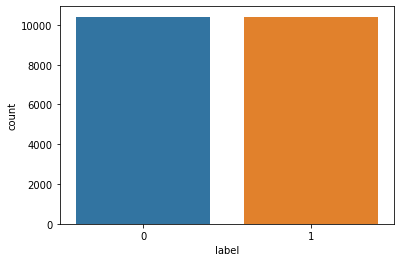

In [10]:
# the count of each value of 'label'
print(df['label'].value_counts())
sns.countplot(df['label'])
plt.show()

### Observations:
        Balanced Dataset

In [11]:
# authors of fake news
fake_news = df['written_by'][df['label']==1]

In [12]:
# 10 authors who have written more number of fake news
plt.figure(figsize=(16,8))
sns.barplot(fake_news.value_counts().keys()[:10], fake_news.value_counts().values[:10])
plt.title("Fake News", fontsize=20)
plt.ylabel('Total No. Of News', fontsize=14)
plt.xlabel('Written By (Author)', fontsize=14)
plt.xticks(rotation=45)
plt.show()


### Observations:
        Authors such as 'Pakalert', 'Eddy Lavine', 'Starkman', 'Alex Ansary', 'Gillian', 'Alexander Light', 'Dave Hodges' and 'Anonymous Writers' have written/published a greater number of fake news. Hence news from these authors is not trustworthy.

In [13]:
# authors of genuine news
genuine_news = df['written_by'][df['label']==0]

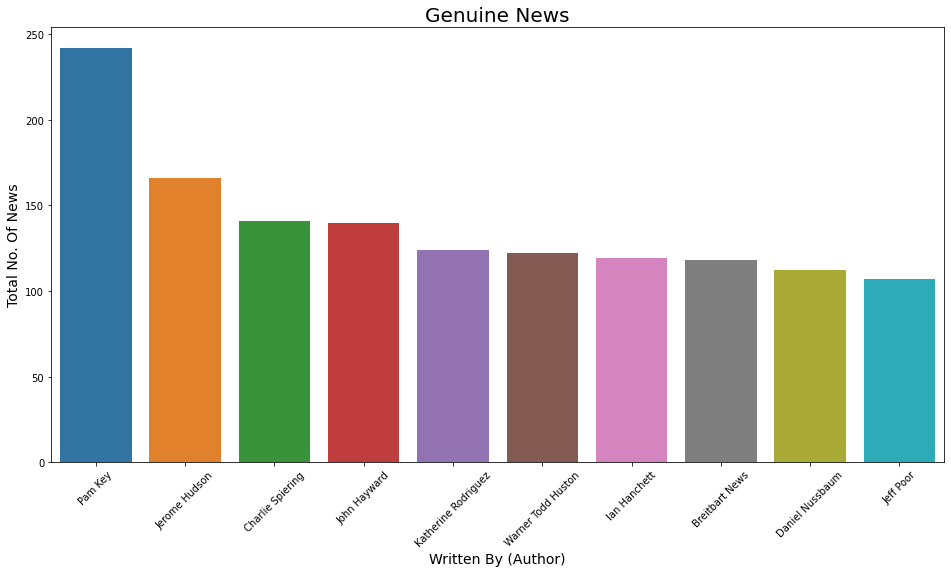

In [14]:
# 10 authors who have written more number of genuine news
plt.figure(figsize=(16,8))
sns.barplot(genuine_news.value_counts().keys()[:10], genuine_news.value_counts().values[:10])
plt.title("Genuine News", fontsize=20)
plt.ylabel('Total No. Of News', fontsize=14)
plt.xlabel('Written By (Author)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Observations:
        Authors such as 'Pam Key', 'Jerome Hudson', 'Charlie Spiering', 'John Hayward', 'Katherine Rodriguez', 'Warner Todd Huston', 'Ian Hanchett', 'Breitbart News', 'Daniel Nussbaum', 'Jeff Poor' have written/published a greater number of genuine news. Hence news from these authors is trustworthy.

# Data Cleaning

In [15]:
# let's drop unwanted columns
df.drop(['Unnamed: 0','id','written_by'],axis=1,inplace=True)

In [16]:
# Null Count
df.isnull().sum()

headline    558
news         39
label         0
dtype: int64

In [17]:
# dropping the NaN values
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

headline    0
news        0
label       0
dtype: int64

In [19]:
# removing any emojis present in the news
df = df.astype(str).apply(lambda x: x.str.encode('ascii', 'ignore').str.decode('ascii'))

In [20]:
# checking Dtype 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20203 entries, 0 to 20799
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   headline  20203 non-null  object
 1   news      20203 non-null  object
 2   label     20203 non-null  object
dtypes: object(3)
memory usage: 631.3+ KB


In [21]:
# converting label column Dtype from object to int 
df['label'] = df['label'].astype(int)

In [22]:
# converting all 'news' to lower case
df['news']=df['news'].str.lower()

# replacing 'numbers' (if any) with 'space'
df['news'] = df['news'].str.replace(r'\d+(\.\d+)?', ' ')

# removing punctuation
df['news'] = df['news'].str.replace(r'[^\w\d\s]', '')

# replacing 'wide-space' between words with a single space
df['news'] = df['news'].str.replace(r'\s+', ' ')

# removing 'underscore'
df['news'] = df['news'].str.replace(r'_', '')

# removing leading and trailing wide-space
df['news'] = df['news'].str.replace(r'^\s+|\s+?$', '')

In [23]:
# converting all 'headline' to lower case
df['headline']=df['headline'].str.lower()

# replacing 'numbers' (if any) with 'space'
df['headline'] = df['headline'].str.replace(r'\d+(\.\d+)?', ' ')

# removing punctuation
df['headline'] = df['headline'].str.replace(r'[^\w\d\s]', '')

# replacing 'wide-space' between words with a single space
df['headline'] = df['headline'].str.replace(r'\s+', ' ')

# removing 'underscore'
df['headline'] = df['headline'].str.replace(r'_', '')

# removing leading and trailing wide-space
df['headline'] = df['headline'].str.replace(r'^\s+|\s+?$', '')

In [24]:
df

headline  ... label
0      ethics questions dogged agriculture nominee as...  ...     0
1      us must dig deep to stop argentinas lionel mes...  ...     0
2      cotton to house do not walk the plank and vote...  ...     0
3      paul lepage besieged maine governor sends conf...  ...     0
4                                a digital if trump wins  ...     1
...                                                  ...  ...   ...
20794  one police shift patrolling an anxious america...  ...     0
20796        albert pike and the european migrant crisis  ...     1
20797  dakota access caught infiltrating protests to ...  ...     1
20798  how to stretch the summer solstice the new yor...  ...     0
20799  emory university to pay for percent of undocum...  ...     0

[20203 rows x 3 columns]

In [25]:
# importing WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# importing stopwords
from nltk.corpus import stopwords

In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
# stop words
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
# removing 'stop words' and lemmatizing words

df['news'] = df['news'].apply(lambda x: ' '.join(
                WordNetLemmatizer().lemmatize(words,pos='v') for words in x.split() 
                if words not in stop_words ))

In [30]:
# removing 'stop words' and lemmatizing words

df['headline'] = df['headline'].apply(lambda x: ' '.join(
                WordNetLemmatizer().lemmatize(words,pos='v') for words in x.split() 
                if words not in stop_words ))

# Text Exploration

In [31]:
# importing word_tokenize
from nltk.tokenize import word_tokenize

# importing SentimentIntensityAnalyzer and Counter
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter

In [32]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## Emotions in the News

Emotions in the News: ['happy', 'lustful', 'safe', 'happy', 'happy', 'happy'] 

Counter({'happy': 4, 'lustful': 1, 'safe': 1}) 



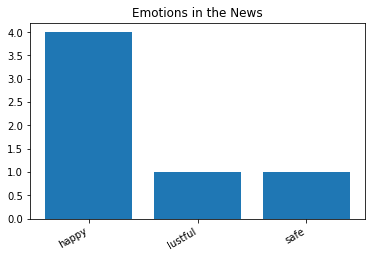

In [34]:
tokens = word_tokenize(df['news'][500],'english') # word tokenization

emotions = '/content/drive/MyDrive/CSV files/emotions.txt'
emotions_list=[]
with open(emotions,'r') as file: # open the emotions file
    for line in file:
        wo_em = line.replace('\n','').replace(',','').replace("'",'').strip()
        word,emotion = wo_em.split(':')
        
        if word in tokens: # extracting emotions of words present in the news
            emotions_list.append(emotion.strip())
            
print("Emotions in the News:",emotions_list,'\n')

em_count=Counter(emotions_list) # emotions count
print(em_count,'\n')

# graphically representing the emotions in news
fig, ax1 = plt.subplots()
ax1.bar(em_count.keys(),em_count.values())
fig.autofmt_xdate()
plt.title('Emotions in the News')
plt.show()

## Sentiment Analysis

In [35]:
# polarity scores
sia = SentimentIntensityAnalyzer()
print('Polarity scores:',sia.polarity_scores(df['news'][500]),'\n')

# news sentiment
def sentiment_analysis(text):
    
    score = sia.polarity_scores(text)
    
    if score['neg'] > score['pos']:
        print('Negative Sentiment')
    
    elif score['pos'] > score['neg']:
        print('Positive Sentiment')
    
    else:
        print('Neutral Sentiment')
        
sentiment_analysis(df['news'][500])

Polarity scores: {'neg': 0.11, 'neu': 0.628, 'pos': 0.262, 'compound': 0.991} 

Positive Sentiment


# Model Training And Testing

In [36]:
# importing TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
# importing models and metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
# TfidfVectorizer Model

tf_idf = TfidfVectorizer(max_features=7500)

# transforming text(news) into features
features = tf_idf.fit_transform(df['news']).todense()

In [39]:
# TfidfVectorizer Model

tf_idf2 = TfidfVectorizer(max_features=7500)

# transforming text(headline) into features
features2 = tf_idf.fit_transform(df['headline']).todense()

In [40]:
# splitting data
x = np.hstack((features, features2)) # stacking features
y = df['label']

In [41]:
# splitting data into train set and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

# Finding The Best Model

In [42]:
# models list
mod_list = [MultinomialNB(),DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),
            SGDClassifier(loss='modified_huber',eta0=0.2)]

In [43]:
# finding the best model
for mod in mod_list:
    print(mod)
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    mod_acc=accuracy_score(y_test,y_pred)
    print('Accuracy score:',mod_acc*100)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print('***************************************************************************************')

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
Accuracy score: 91.86299742625222
[[2521   81]
 [ 330 2119]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2602
           1       0.96      0.87      0.91      2449

    accuracy                           0.92      5051
   macro avg       0.92      0.92      0.92      5051
weighted avg       0.92      0.92      0.92      5051

***************************************************************************************
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Accuracy score: 95.58503266679865
[[24

In [44]:
# best model
sgd = SGDClassifier(loss='modified_huber',eta0=0.2)
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
mod_acc=accuracy_score(y_test,y_pred)
print('Accuracy score:',mod_acc*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 98.07958820035635
[[2564   38]
 [  59 2390]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2602
           1       0.98      0.98      0.98      2449

    accuracy                           0.98      5051
   macro avg       0.98      0.98      0.98      5051
weighted avg       0.98      0.98      0.98      5051



### Observations:
        From above it is evident that SGD Classifier model is performing better with an accuracy score of 98%.

In [45]:
# cross_val_score
cv_score=cross_val_score(sgd,x,y,cv=8).mean()
print('Cross_val_score:',cv_score*100)

Cross_val_score: 97.99532583899719


In [46]:
# importing log_loss
from sklearn.metrics import log_loss

# predicted probabilities
y_pred_proba = sgd.predict_proba(x_test)
# log_loss
ll=log_loss(y_test,y_pred_proba)
ll

0.08262700420785254

## Hyper-parameter Tuning

In [47]:
# importing GridSearchCV
from sklearn.model_selection import GridSearchCV

In [48]:
parameter1 = {
    'penalty':['l1','l2','elasticnet'],
    'fit_intercept':[True,False]
}

gscv1 = GridSearchCV(sgd,parameter1,scoring='accuracy')
gscv1.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.2, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='modified_huber', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,

In [49]:
parameter2 = {
    'learning_rate':['constant','optimal','invscaling','adaptive'],
    'early_stopping':[True,False]
}

gscv2 = GridSearchCV(sgd,parameter2,scoring='accuracy')
gscv2.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.2, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='modified_huber', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'early_stopping': [True, False],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive']},
  

In [50]:
print(gscv1.best_params_,
      gscv2.best_params_
      )

{'fit_intercept': True, 'penalty': 'elasticnet'} {'early_stopping': False, 'learning_rate': 'adaptive'}


In [51]:
sgd = SGDClassifier(loss='modified_huber',eta0=0.2,penalty='elasticnet',fit_intercept=True,learning_rate='adaptive',early_stopping=False)
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
mod_acc=accuracy_score(y_test,y_pred)
print('Accuracy score:',mod_acc*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy score: 97.28766580875075
[[2496  106]
 [  31 2418]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2602
           1       0.96      0.99      0.97      2449

    accuracy                           0.97      5051
   macro avg       0.97      0.97      0.97      5051
weighted avg       0.97      0.97      0.97      5051



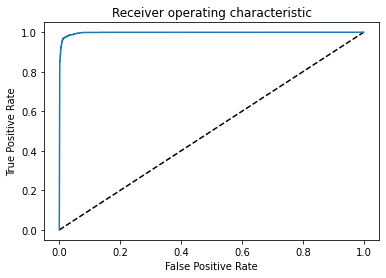

In [52]:
# importing metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score

# ROC curve
y_pred_proba = sgd.predict_proba(x_test)[:,1]

fpr,tpr,threshold = roc_curve(y_test,y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [53]:
# roc_auc_score
ra_score = roc_auc_score(y_test,y_pred_proba)
ra_score

0.997404939317025

In [54]:
import joblib

# saving the best model for production
joblib.dump(sgd,'Fake_News_Detection_Model.obj')

['Fake_News_Detection_Model.obj']